In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance


In [7]:
df

,Artist Name,Track Name,Popularity,danceability,energy,loudness,mode,acousticness,liveness,valence,...,key_encoded_4.0,key_encoded_5.0,key_encoded_6.0,key_encoded_7.0,key_encoded_8.0,key_encoded_9.0,key_encoded_10.0,key_encoded_11.0,log-instrumentalness,log-speechiness
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,-4.964,1,0.017100,0.0849,0.8990,...,0,0,0,0,0,0,0,0,NaN,-3.026191
1,Boston,Hitch a Ride,54.0,0.382,0.814,-7.230,1,0.001100,0.1010,0.5690,...,0,0,0,0,0,0,0,0,-5.518964,-3.203987
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,-8.334,1,0.486000,0.3940,0.7870,...,0,0,1,0,0,0,0,0,-8.537396,-2.946942
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,-6.528,0,0.021200,0.1220,0.5690,...,0,0,0,0,0,0,1,0,NaN,-2.891372
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,-4.279,1,0.000169,0.1720,0.0918,...,0,0,0,0,0,0,0,0,-4.128936,-1.532477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,-17.100,0,0.993000,0.0984,0.1770,...,0,0,0,1,0,0,0,0,-0.193585,-3.186893
17992,Micatone,All Gone,27.0,0.638,0.223,-10.174,0,0.858000,0.0705,0.3350,...,0,0,0,0,0,0,0,1,-11.036691,-3.414283
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,-4.683,0,0.000030,0.6660,0.2620,...,1,0,0,0,0,0,0,0,-8.902856,-2.642262
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,-12.757,0,0.001290,0.2560,0.3550,...,0,0,1,0,0,0,0,0,-0.087739,-2.009915


In [3]:
file_path = "/mnt/c/Users/ahuja/Downloads/train.csv"
df = pd.read_csv(file_path)

#cleaning
time_sig_encoded = pd.get_dummies(df['time_signature'], prefix='time_sig')
key_encoded = pd.get_dummies(df['key'], prefix='key_encoded')
df = pd.concat([df, time_sig_encoded, key_encoded], axis=1)
df.drop(['time_signature','key'], axis=1, inplace=True)

df['log-instrumentalness'] = np.log(df['instrumentalness'])
df['log-speechiness'] = np.log(df['speechiness'])
df.drop(columns = ['instrumentalness', 'speechiness'], inplace = True)

#split
train, test = train_test_split(df, test_size=0.25, random_state=1000)

train_targets = train['Class']
test_targets = test['Class']

train.drop(['Artist Name','Track Name','Class'], axis=1, inplace=True)
test.drop(['Artist Name','Track Name','Class'], axis=1, inplace=True)

imputer = SimpleImputer(strategy='mean')
train = imputer.fit_transform(train)
test = imputer.fit_transform(test)

scaler = StandardScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)


rf = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=2, min_samples_leaf=5, max_features='auto')
rf.fit(train, train_targets)


/home/rhahuja/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=20, max_features='auto', min_samples_leaf=5,
                       n_estimators=200)

In [4]:
test_df = pd.DataFrame(train, columns=df.columns.drop(['Artist Name','Track Name','Class']))    
result = permutation_importance(rf, test_df, train_targets, n_repeats=10, random_state=0)
for i in result.importances_mean.argsort()[::-1]:
    feature_name = test_df.columns[i]
    importance_score = result.importances_mean[i]/ np.sum(result.importances_mean)
    print("{:<8}: {:.3f}".format(feature_name, importance_score))

/home/rhahuja/anaconda3/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/rhahuja/anaconda3/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/rhahuja/anaconda3/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/rhahuja/anaconda3/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/rhahuja/anaconda3/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/rhahuja/anaconda3/lib/python3.9/site-packages/sklearn/base.py:432: UserWar

In [5]:

y_pred = rf.predict(test)
accuracy = accuracy_score(test_targets, y_pred)
print("Accuracy:", accuracy)

f1_score = f1_score(test_targets, y_pred, average = 'weighted')
print("F1 score (weighted ):", f1_score)

Accuracy: 0.5370082240497889
F1 score (weighted ): 0.5121264429605469


In [2]:
param_grid = {
    'n_estimators': [50, 100, 200, 500, 1000],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}
gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose = 3)
gs.fit(train, train_targets)

NameError: name 'rf' is not defined

In [55]:
param_grid = {
    'n_estimators': [50, 100, 200, 500, 1000],
    'max_depth': [10, 20, 25],
    'min_samples_split': [1, 2, 5],
    'min_samples_leaf': [3, 5, 10]
}
gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose = 3)
gs.fit(train, train_targets)

Fitting 5 folds for each of 135 candidates, totalling 675 fits
[CV 1/5] END max_depth=10, min_samples_leaf=3, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=3, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=3, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=3, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=3, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END m

/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.513 total time=   1.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.519 total time=   1.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.534 total time=   1.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.534 total time=   1.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.544 total time=   1.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.513 total time=   2.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.527 total time=   2.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.537 total time=   2.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.532 total time=   2.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.549 total time=   2.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.510 total time=   4.0s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.524 total time=   4.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.539 total time=   4.0s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.534 total time=   3.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.554 total time=   3.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=500;, score=0.517 total time=   9.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=500;, score=0.530 total time=   9.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=500;, score=0.536 total time=   9.0s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=500;, score=0.534 total time=   9.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=500;, score=0.552 total time=   9.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=1000;, score=0.520 total time=  18.0s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=1000;, score=0.527 total time=  18.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=1000;, score=0.538 total time=  18.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=1000;, score=0.533 total time=  18.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=1000;, score=0.553 total time=  17.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.507 total time=   0.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.524 total time=   0.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.532 total time=   0.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.536 total time=   0.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.548 total time=   0.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.512 total time=   1.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.532 total time=   1.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.535 total time=   1.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.535 total time=   1.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.553 total time=   1.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.519 total time=   3.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.524 total time=   3.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.534 total time=   3.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.536 total time=   3.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.551 total time=   3.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=500;, score=0.517 total time=   9.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=500;, score=0.531 total time=  10.0s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=500;, score=0.537 total time=  10.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=500;, score=0.535 total time=  10.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=500;, score=0.552 total time=   9.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=1000;, score=0.517 total time=  18.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=1000;, score=0.529 total time=  18.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=1000;, score=0.538 total time=  18.0s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=1000;, score=0.534 total time=  18.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=1000;, score=0.553 total time=  18.3s
[CV 1/5] END max_depth=10, min_samples_leaf=5, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=5, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=5, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=5, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=5, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=5, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=5, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=5, min_samples_split=1, n_esti

/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.515 total time=   0.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.518 total time=   0.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.534 total time=   0.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.529 total time=   0.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.541 total time=   0.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.516 total time=   1.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.523 total time=   1.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.527 total time=   1.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.532 total time=   1.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.549 total time=   1.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.513 total time=   3.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.532 total time=   3.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.535 total time=   3.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.529 total time=   3.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.549 total time=   3.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=500;, score=0.517 total time=   9.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=500;, score=0.532 total time=   9.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=500;, score=0.534 total time=   9.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=500;, score=0.536 total time=  10.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=500;, score=0.553 total time=   9.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=1000;, score=0.519 total time=  19.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=1000;, score=0.531 total time=  18.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=1000;, score=0.534 total time=  17.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=1000;, score=0.538 total time=  17.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=1000;, score=0.550 total time=  18.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.514 total time=   0.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.524 total time=   0.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.533 total time=   0.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.528 total time=   0.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.537 total time=   0.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.511 total time=   1.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.529 total time=   1.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.536 total time=   1.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.531 total time=   1.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.551 total time=   1.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.519 total time=   3.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.526 total time=   3.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.534 total time=   3.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.534 total time=   3.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.549 total time=   3.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=500;, score=0.515 total time=   9.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=500;, score=0.524 total time=   9.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=500;, score=0.539 total time=   9.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=500;, score=0.536 total time=   8.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=500;, score=0.552 total time=   9.0s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=1000;, score=0.518 total time=  18.0s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=1000;, score=0.529 total time=  18.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=1000;, score=0.539 total time=  18.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=1000;, score=0.536 total time=  19.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=1000;, score=0.555 total time=  19.0s
[CV 1/5] END max_depth=10, min_samples_leaf=10, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=10, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=10, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=10, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=10, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=10, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=10, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=10, min_samples_split=1

/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.509 total time=   0.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.527 total time=   0.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.521 total time=   0.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.526 total time=   0.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.546 total time=   0.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.515 total time=   1.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.525 total time=   1.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.526 total time=   1.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.526 total time=   1.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.550 total time=   1.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=200;, score=0.513 total time=   3.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=200;, score=0.526 total time=   3.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=200;, score=0.532 total time=   3.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=200;, score=0.532 total time=   3.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=200;, score=0.549 total time=   3.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=500;, score=0.515 total time=   8.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=500;, score=0.526 total time=   8.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=500;, score=0.537 total time=   8.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=500;, score=0.529 total time=   8.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=500;, score=0.549 total time=   8.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=1000;, score=0.516 total time=  17.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=1000;, score=0.527 total time=  18.0s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=1000;, score=0.535 total time=  17.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=1000;, score=0.534 total time=  17.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=1000;, score=0.551 total time=  16.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.514 total time=   0.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.524 total time=   0.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.528 total time=   0.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.531 total time=   0.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.546 total time=   0.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.515 total time=   1.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.527 total time=   1.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.529 total time=   1.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.526 total time=   1.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.545 total time=   1.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=200;, score=0.513 total time=   3.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=200;, score=0.521 total time=   3.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=200;, score=0.533 total time=   3.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=200;, score=0.528 total time=   3.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=200;, score=0.550 total time=   3.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=500;, score=0.512 total time=   8.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=500;, score=0.526 total time=   8.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=500;, score=0.534 total time=   8.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=500;, score=0.532 total time=   8.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=500;, score=0.548 total time=   8.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=1000;, score=0.515 total time=  17.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=1000;, score=0.526 total time=  17.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=1000;, score=0.534 total time=  17.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=1000;, score=0.535 total time=  17.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=1000;, score=0.550 total time=  17.4s
[CV 1/5] END max_depth=20, min_samples_leaf=3, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END max_depth=20, min_samples_leaf=3, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END max_depth=20, min_samples_leaf=3, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END max_depth=20, min_samples_leaf=3, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END max_depth=20, min_samples_leaf=3, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END max_depth=20, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END max_depth=20, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END max_depth=20, min_samples_leaf=3, min_samples_split=1, n_est

/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.508 total time=   1.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.512 total time=   1.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.528 total time=   1.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.521 total time=   1.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.539 total time=   1.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.509 total time=   2.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.518 total time=   2.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.536 total time=   2.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.521 total time=   2.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.543 total time=   2.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.513 total time=   5.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.515 total time=   5.0s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.535 total time=   5.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.528 total time=   5.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.546 total time=   5.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=500;, score=0.514 total time=  12.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=500;, score=0.515 total time=  12.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=500;, score=0.537 total time=  13.0s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=500;, score=0.528 total time=  14.0s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=500;, score=0.545 total time=  13.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=1000;, score=0.514 total time=  27.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=1000;, score=0.514 total time=  28.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=1000;, score=0.537 total time=  27.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=1000;, score=0.526 total time=  26.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=1000;, score=0.549 total time=  25.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.510 total time=   1.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.522 total time=   1.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.521 total time=   1.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.523 total time=   1.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.542 total time=   1.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.514 total time=   2.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.520 total time=   2.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.535 total time=   2.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.528 total time=   2.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.534 total time=   2.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.509 total time=   5.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.519 total time=   5.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.535 total time=   5.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.529 total time=   5.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.544 total time=   5.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=500;, score=0.513 total time=  13.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=500;, score=0.513 total time=  12.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=500;, score=0.533 total time=  13.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=500;, score=0.527 total time=  12.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=500;, score=0.545 total time=  12.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=1000;, score=0.511 total time=  26.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=1000;, score=0.518 total time=  25.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=1000;, score=0.536 total time=  25.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=1000;, score=0.528 total time=  25.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=1000;, score=0.547 total time=  25.4s
[CV 1/5] END max_depth=20, min_samples_leaf=5, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END max_depth=20, min_samples_leaf=5, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END max_depth=20, min_samples_leaf=5, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END max_depth=20, min_samples_leaf=5, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END max_depth=20, min_samples_leaf=5, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END max_depth=20, min_samples_leaf=5, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END max_depth=20, min_samples_leaf=5, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END max_depth=20, min_samples_leaf=5, min_samples_split=1, n_esti

/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=20, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.523 total time=   1.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=20, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.521 total time=   1.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=20, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.529 total time=   1.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=20, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.526 total time=   1.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=20, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.543 total time=   1.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=20, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.519 total time=   2.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=20, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.527 total time=   2.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=20, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.542 total time=   2.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=20, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.534 total time=   2.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=20, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.549 total time=   2.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=20, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.516 total time=   4.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=20, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.526 total time=   4.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=20, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.539 total time=   4.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=20, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.536 total time=   4.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=20, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.551 total time=   4.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=20, min_samples_leaf=5, min_samples_split=2, n_estimators=500;, score=0.518 total time=  12.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=20, min_samples_leaf=5, min_samples_split=2, n_estimators=500;, score=0.523 total time=  11.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=20, min_samples_leaf=5, min_samples_split=2, n_estimators=500;, score=0.539 total time=  11.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=20, min_samples_leaf=5, min_samples_split=2, n_estimators=500;, score=0.536 total time=  11.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=20, min_samples_leaf=5, min_samples_split=2, n_estimators=500;, score=0.557 total time=  11.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=20, min_samples_leaf=5, min_samples_split=2, n_estimators=1000;, score=0.518 total time=  23.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=20, min_samples_leaf=5, min_samples_split=2, n_estimators=1000;, score=0.530 total time=  23.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=20, min_samples_leaf=5, min_samples_split=2, n_estimators=1000;, score=0.538 total time=  24.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=20, min_samples_leaf=5, min_samples_split=2, n_estimators=1000;, score=0.538 total time=  24.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=20, min_samples_leaf=5, min_samples_split=2, n_estimators=1000;, score=0.557 total time=  24.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.520 total time=   1.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.526 total time=   1.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.533 total time=   1.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.535 total time=   1.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.546 total time=   1.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.516 total time=   2.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.535 total time=   2.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.537 total time=   2.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.533 total time=   2.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.552 total time=   2.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.518 total time=   4.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.526 total time=   4.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.537 total time=   4.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.534 total time=   4.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.554 total time=   4.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=500;, score=0.519 total time=  11.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=500;, score=0.524 total time=  12.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=500;, score=0.538 total time=  11.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=500;, score=0.538 total time=  11.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=500;, score=0.559 total time=  11.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=1000;, score=0.518 total time=  24.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=1000;, score=0.527 total time=  24.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=1000;, score=0.539 total time=  23.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=1000;, score=0.537 total time=  24.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=1000;, score=0.555 total time=  23.6s
[CV 1/5] END max_depth=20, min_samples_leaf=10, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END max_depth=20, min_samples_leaf=10, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END max_depth=20, min_samples_leaf=10, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END max_depth=20, min_samples_leaf=10, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END max_depth=20, min_samples_leaf=10, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END max_depth=20, min_samples_leaf=10, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END max_depth=20, min_samples_leaf=10, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END max_depth=20, min_samples_leaf=10, min_samples_split=1

/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.517 total time=   1.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.526 total time=   1.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.540 total time=   1.0s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.534 total time=   1.0s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.549 total time=   1.0s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.523 total time=   2.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.525 total time=   2.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.534 total time=   2.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.532 total time=   2.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.557 total time=   2.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=200;, score=0.522 total time=   4.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=200;, score=0.536 total time=   4.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=200;, score=0.540 total time=   4.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=200;, score=0.531 total time=   4.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=200;, score=0.560 total time=   4.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=500;, score=0.522 total time=  10.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=500;, score=0.533 total time=  10.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=500;, score=0.545 total time=  10.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=500;, score=0.537 total time=  10.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=500;, score=0.559 total time=  10.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=1000;, score=0.520 total time=  21.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=1000;, score=0.530 total time=  21.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=1000;, score=0.541 total time=  21.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=1000;, score=0.538 total time=  20.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=1000;, score=0.557 total time=  21.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.520 total time=   1.0s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.533 total time=   1.0s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.530 total time=   1.0s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.529 total time=   1.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.549 total time=   1.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.519 total time=   2.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.528 total time=   2.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.540 total time=   2.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.536 total time=   2.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.551 total time=   2.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=200;, score=0.520 total time=   4.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=200;, score=0.530 total time=   4.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=200;, score=0.541 total time=   4.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=200;, score=0.538 total time=   4.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=200;, score=0.558 total time=   4.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=500;, score=0.521 total time=  10.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=500;, score=0.533 total time=  10.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=500;, score=0.539 total time=  11.0s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=500;, score=0.537 total time=  10.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=500;, score=0.559 total time=  10.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=1000;, score=0.519 total time=  21.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=1000;, score=0.532 total time=  21.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=1000;, score=0.544 total time=  21.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=1000;, score=0.536 total time=  21.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=1000;, score=0.558 total time=  20.8s
[CV 1/5] END max_depth=25, min_samples_leaf=3, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END max_depth=25, min_samples_leaf=3, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END max_depth=25, min_samples_leaf=3, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END max_depth=25, min_samples_leaf=3, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END max_depth=25, min_samples_leaf=3, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END max_depth=25, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END max_depth=25, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END max_depth=25, min_samples_leaf=3, min_samples_split=1, n_est

/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=25, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.506 total time=   1.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=25, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.507 total time=   1.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=25, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.520 total time=   1.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=25, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.514 total time=   1.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=25, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.530 total time=   1.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=25, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.503 total time=   2.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=25, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.519 total time=   2.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=25, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.528 total time=   2.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=25, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.522 total time=   2.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=25, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.542 total time=   2.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=25, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.507 total time=   5.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=25, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.520 total time=   5.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=25, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.531 total time=   5.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=25, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.527 total time=   5.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=25, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.541 total time=   5.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=25, min_samples_leaf=3, min_samples_split=2, n_estimators=500;, score=0.513 total time=  13.0s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=25, min_samples_leaf=3, min_samples_split=2, n_estimators=500;, score=0.513 total time=  12.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=25, min_samples_leaf=3, min_samples_split=2, n_estimators=500;, score=0.534 total time=  12.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=25, min_samples_leaf=3, min_samples_split=2, n_estimators=500;, score=0.523 total time=  13.0s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=25, min_samples_leaf=3, min_samples_split=2, n_estimators=500;, score=0.541 total time=  13.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=25, min_samples_leaf=3, min_samples_split=2, n_estimators=1000;, score=0.512 total time=  26.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=25, min_samples_leaf=3, min_samples_split=2, n_estimators=1000;, score=0.513 total time=  25.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=25, min_samples_leaf=3, min_samples_split=2, n_estimators=1000;, score=0.531 total time=  25.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=25, min_samples_leaf=3, min_samples_split=2, n_estimators=1000;, score=0.528 total time=  26.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=25, min_samples_leaf=3, min_samples_split=2, n_estimators=1000;, score=0.546 total time=  26.0s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=25, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.507 total time=   1.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=25, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.505 total time=   1.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=25, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.522 total time=   1.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=25, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.521 total time=   1.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=25, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.537 total time=   1.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=25, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.514 total time=   2.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=25, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.513 total time=   2.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=25, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.528 total time=   2.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=25, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.528 total time=   2.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=25, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.542 total time=   2.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=25, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.511 total time=   5.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=25, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.514 total time=   5.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=25, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.528 total time=   5.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=25, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.530 total time=   5.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=25, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.542 total time=   5.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=25, min_samples_leaf=3, min_samples_split=5, n_estimators=500;, score=0.513 total time=  13.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=25, min_samples_leaf=3, min_samples_split=5, n_estimators=500;, score=0.516 total time=  12.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=25, min_samples_leaf=3, min_samples_split=5, n_estimators=500;, score=0.532 total time=  13.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=25, min_samples_leaf=3, min_samples_split=5, n_estimators=500;, score=0.527 total time=  12.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=25, min_samples_leaf=3, min_samples_split=5, n_estimators=500;, score=0.543 total time=  12.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=25, min_samples_leaf=3, min_samples_split=5, n_estimators=1000;, score=0.512 total time=  26.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=25, min_samples_leaf=3, min_samples_split=5, n_estimators=1000;, score=0.515 total time=  26.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=25, min_samples_leaf=3, min_samples_split=5, n_estimators=1000;, score=0.531 total time=  27.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=25, min_samples_leaf=3, min_samples_split=5, n_estimators=1000;, score=0.525 total time=  28.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=25, min_samples_leaf=3, min_samples_split=5, n_estimators=1000;, score=0.547 total time=  28.7s
[CV 1/5] END max_depth=25, min_samples_leaf=5, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END max_depth=25, min_samples_leaf=5, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END max_depth=25, min_samples_leaf=5, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END max_depth=25, min_samples_leaf=5, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END max_depth=25, min_samples_leaf=5, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END max_depth=25, min_samples_leaf=5, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END max_depth=25, min_samples_leaf=5, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END max_depth=25, min_samples_leaf=5, min_samples_split=1, n_esti

/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=25, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.511 total time=   1.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=25, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.526 total time=   1.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=25, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.539 total time=   1.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=25, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.535 total time=   1.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=25, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.546 total time=   1.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=25, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.516 total time=   2.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=25, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.524 total time=   2.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=25, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.540 total time=   2.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=25, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.535 total time=   2.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=25, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.547 total time=   2.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=25, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.515 total time=   5.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=25, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.529 total time=   5.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=25, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.538 total time=   5.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=25, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.532 total time=   5.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=25, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.554 total time=   5.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=25, min_samples_leaf=5, min_samples_split=2, n_estimators=500;, score=0.515 total time=  12.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=25, min_samples_leaf=5, min_samples_split=2, n_estimators=500;, score=0.532 total time=  12.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=25, min_samples_leaf=5, min_samples_split=2, n_estimators=500;, score=0.539 total time=  13.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=25, min_samples_leaf=5, min_samples_split=2, n_estimators=500;, score=0.533 total time=  12.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=25, min_samples_leaf=5, min_samples_split=2, n_estimators=500;, score=0.555 total time=  12.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=25, min_samples_leaf=5, min_samples_split=2, n_estimators=1000;, score=0.516 total time=  23.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=25, min_samples_leaf=5, min_samples_split=2, n_estimators=1000;, score=0.529 total time=  23.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=25, min_samples_leaf=5, min_samples_split=2, n_estimators=1000;, score=0.539 total time=  24.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=25, min_samples_leaf=5, min_samples_split=2, n_estimators=1000;, score=0.534 total time=  23.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=25, min_samples_leaf=5, min_samples_split=2, n_estimators=1000;, score=0.555 total time=  23.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.505 total time=   1.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.527 total time=   1.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.534 total time=   1.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.531 total time=   1.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.546 total time=   1.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.524 total time=   2.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.519 total time=   2.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.540 total time=   2.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.536 total time=   2.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.551 total time=   2.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.517 total time=   5.0s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.530 total time=   4.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.538 total time=   4.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.532 total time=   4.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.552 total time=   4.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=500;, score=0.515 total time=  12.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=500;, score=0.526 total time=  12.0s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=500;, score=0.538 total time=  11.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=500;, score=0.533 total time=  11.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=500;, score=0.551 total time=  11.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=1000;, score=0.519 total time=  23.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=1000;, score=0.533 total time=  24.0s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=1000;, score=0.538 total time=  24.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=1000;, score=0.536 total time=  23.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=1000;, score=0.555 total time=  24.7s
[CV 1/5] END max_depth=25, min_samples_leaf=10, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END max_depth=25, min_samples_leaf=10, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END max_depth=25, min_samples_leaf=10, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END max_depth=25, min_samples_leaf=10, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END max_depth=25, min_samples_leaf=10, min_samples_split=1, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END max_depth=25, min_samples_leaf=10, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END max_depth=25, min_samples_leaf=10, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END max_depth=25, min_samples_leaf=10, min_samples_split=1

/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=25, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.517 total time=   1.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=25, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.530 total time=   1.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=25, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.534 total time=   1.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=25, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.528 total time=   1.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=25, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.552 total time=   1.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=25, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.520 total time=   2.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=25, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.533 total time=   2.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=25, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.537 total time=   2.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=25, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.535 total time=   2.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=25, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.552 total time=   2.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=25, min_samples_leaf=10, min_samples_split=2, n_estimators=200;, score=0.519 total time=   4.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=25, min_samples_leaf=10, min_samples_split=2, n_estimators=200;, score=0.532 total time=   4.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=25, min_samples_leaf=10, min_samples_split=2, n_estimators=200;, score=0.535 total time=   4.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=25, min_samples_leaf=10, min_samples_split=2, n_estimators=200;, score=0.538 total time=   4.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=25, min_samples_leaf=10, min_samples_split=2, n_estimators=200;, score=0.557 total time=   4.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=25, min_samples_leaf=10, min_samples_split=2, n_estimators=500;, score=0.521 total time=  11.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=25, min_samples_leaf=10, min_samples_split=2, n_estimators=500;, score=0.535 total time=  11.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=25, min_samples_leaf=10, min_samples_split=2, n_estimators=500;, score=0.541 total time=  11.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=25, min_samples_leaf=10, min_samples_split=2, n_estimators=500;, score=0.539 total time=  11.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=25, min_samples_leaf=10, min_samples_split=2, n_estimators=500;, score=0.557 total time=  11.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=25, min_samples_leaf=10, min_samples_split=2, n_estimators=1000;, score=0.519 total time=  23.0s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=25, min_samples_leaf=10, min_samples_split=2, n_estimators=1000;, score=0.531 total time=  22.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=25, min_samples_leaf=10, min_samples_split=2, n_estimators=1000;, score=0.541 total time=  22.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=25, min_samples_leaf=10, min_samples_split=2, n_estimators=1000;, score=0.535 total time=  21.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=25, min_samples_leaf=10, min_samples_split=2, n_estimators=1000;, score=0.557 total time=  20.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=25, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.523 total time=   1.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=25, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.527 total time=   1.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=25, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.535 total time=   1.0s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=25, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.534 total time=   1.0s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=25, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.545 total time=   1.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=25, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.516 total time=   2.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=25, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.531 total time=   2.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=25, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.536 total time=   2.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=25, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.534 total time=   2.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=25, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.553 total time=   2.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=25, min_samples_leaf=10, min_samples_split=5, n_estimators=200;, score=0.525 total time=   4.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=25, min_samples_leaf=10, min_samples_split=5, n_estimators=200;, score=0.531 total time=   4.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=25, min_samples_leaf=10, min_samples_split=5, n_estimators=200;, score=0.539 total time=   4.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=25, min_samples_leaf=10, min_samples_split=5, n_estimators=200;, score=0.539 total time=   4.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=25, min_samples_leaf=10, min_samples_split=5, n_estimators=200;, score=0.558 total time=   4.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=25, min_samples_leaf=10, min_samples_split=5, n_estimators=500;, score=0.522 total time=  10.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=25, min_samples_leaf=10, min_samples_split=5, n_estimators=500;, score=0.531 total time=  10.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=25, min_samples_leaf=10, min_samples_split=5, n_estimators=500;, score=0.538 total time=  10.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=25, min_samples_leaf=10, min_samples_split=5, n_estimators=500;, score=0.536 total time=  10.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=25, min_samples_leaf=10, min_samples_split=5, n_estimators=500;, score=0.558 total time=  10.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=25, min_samples_leaf=10, min_samples_split=5, n_estimators=1000;, score=0.521 total time=  20.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=25, min_samples_leaf=10, min_samples_split=5, n_estimators=1000;, score=0.530 total time=  20.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=25, min_samples_leaf=10, min_samples_split=5, n_estimators=1000;, score=0.542 total time=  21.3s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=25, min_samples_leaf=10, min_samples_split=5, n_estimators=1000;, score=0.537 total time=  20.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=25, min_samples_leaf=10, min_samples_split=5, n_estimators=1000;, score=0.559 total time=  20.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
225 fits failed out of a total of 675.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/h

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=20, max_features='auto',
                                              min_samples_leaf=5,
                                              n_estimators=200),
             param_grid={'max_depth': [10, 20, 25],
                         'min_samples_leaf': [3, 5, 10],
                         'min_samples_split': [1, 2, 5],
                         'n_estimators': [50, 100, 200, 500, 1000]},
             verbose=3)

In [56]:
print(gs.best_params_)

{'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 500}


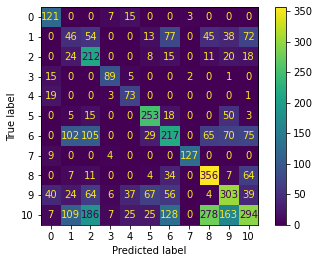

In [6]:
cm = confusion_matrix(test_targets, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot();

In [7]:
important_features = ['duration_in min/ms', 'acousticness', 'speechiness', 'instrumentalness', 'danceability']

train_cols = df.columns.drop(['Artist Name', 'Track Name', 'Class'])
train_cols = train_cols.append(pd.Index(['duration_in min/ms', 'acousticness', 'speechiness', 'instrumentalness', 'danceability']))


train_important = train[:, [train_cols.tolist().index(col) for col in important_features]]
test_important = test[:, [train_cols.tolist().index(col) for col in important_features]]

imputer = SimpleImputer(strategy='mean')
train_important = imputer.fit_transform(train_important)
test_important = imputer.transform(test_important)

rf_important = RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_split=5, min_samples_leaf=3, max_features='auto')
rf_important.fit(train_important, train_targets)

/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=10, max_features='auto', min_samples_leaf=3,
                       min_samples_split=5, n_estimators=500)

In [8]:
y_pred_important = rf_important.predict(test_important)

accuracy_important = accuracy_score(test_targets, y_pred_important)
#f1_important = f1_score(test_targets, y_pred_important, average='weighted')
print('Accuracy (using important features):', accuracy_important)
#print('F1 score (using important features):', f1_important)

Accuracy (using important features): 0.49277617248277394


In [9]:
class_labels = df['Class']
print(class_labels)

0         5
1        10
2         6
3         5
4        10
         ..
17991     6
17992     2
17993     8
17994     8
17995    10
Name: Class, Length: 17996, dtype: int64


In [50]:
train_size_abs, train_scores, test_scores = learning_curve(rf, train, train_targets, train_sizes = np.linspace(0.1, 1.0, 10), verbose = 3)


[learning_curve] Training set sizes: [ 1079  2159  3239  4318  5398  6478  7557  8637  9717 10797]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.782, test=0.471) total time=   0.8s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.798, test=0.505) total time=   1.1s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s
/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.798, test=0.510) total time=   1.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.797, test=0.517) total time=   2.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.792, test=0.523) total time=   2.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.786, test=0.522) total time=   3.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.781, test=0.517) total time=   3.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.777, test=0.520) total time=   3.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.773, test=0.515) total time=   4.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.770, test=0.510) total time=   4.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.810, test=0.480) total time=   0.8s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.812, test=0.503) total time=   1.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.797, test=0.505) total time=   1.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.799, test=0.522) total time=   2.0s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.788, test=0.526) total time=   2.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.786, test=0.529) total time=   2.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.781, test=0.525) total time=   3.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.772, test=0.529) total time=   3.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.769, test=0.524) total time=   4.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.772, test=0.522) total time=   5.0s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.802, test=0.486) total time=   0.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.806, test=0.515) total time=   1.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.801, test=0.516) total time=   1.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.798, test=0.520) total time=   2.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.795, test=0.527) total time=   2.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.790, test=0.527) total time=   3.0s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.781, test=0.537) total time=   3.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.781, test=0.536) total time=   3.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.779, test=0.536) total time=   4.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.775, test=0.539) total time=   5.0s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.804, test=0.481) total time=   0.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.809, test=0.507) total time=   1.2s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.797, test=0.510) total time=   1.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.794, test=0.519) total time=   2.0s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.794, test=0.526) total time=   2.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.795, test=0.525) total time=   2.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.790, test=0.533) total time=   3.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.784, test=0.531) total time=   4.0s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.777, test=0.533) total time=   4.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.775, test=0.537) total time=   4.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.809, test=0.493) total time=   0.7s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.804, test=0.520) total time=   1.1s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.800, test=0.529) total time=   1.6s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.797, test=0.536) total time=   2.0s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.798, test=0.533) total time=   2.5s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.796, test=0.539) total time=   2.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.790, test=0.543) total time=   3.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.785, test=0.545) total time=   3.9s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.778, test=0.550) total time=   4.4s


/home/bnarayanan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..................., score=(train=0.773, test=0.553) total time=   4.9s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.5min finished


In [51]:
train_list = []
for x in train_size_abs:
    train_list.append(str(x))

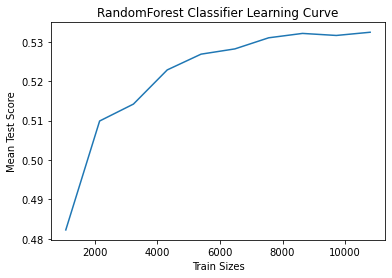

In [53]:
plt.plot(train_size_abs, np.mean(test_scores, axis = 1))
plt.xlabel('Train Sizes')
plt.ylabel('Mean Test Score')
plt.title('RandomForest Classifier Learning Curve');

In [10]:
# train_file_path = "/home/bnarayanan/Group024-Wi23/Music-Genre_Data/train.csv"
# train = pd.read_csv(train_file_path)
# train = train.fillna(0)
# train.head()

# test_file_path = "/home/bnarayanan/Group024-Wi23/Music-Genre_Data/test.csv"
# test = pd.read_csv(test_file_path)
# test = test.fillna(0)
# test.head()

# train_targets = train['Class']
# test_targets = train['Class']

# train.isna().sum()

# train['Class'].value_counts()

# scaler = StandardScaler()

# train.drop(['Artist Name','Track Name','Class'], axis=1, inplace=True)
# test.drop(['Artist Name','Track Name'], axis=1, inplace=True)

# train.isna().sum()

# train.shape, train_targets.shape, test_targets.shape, test.shape


# scaler.fit(train)
# train = scaler.transform(train)
# test = scaler.transform(test)

# rf = RandomForestClassifier()
# rf.fit(train, train_targets)
#random_state = 2022, n_jobs = -1, n_estimators = 1000, verbose=1

# y_pred = rf.predict(test)
# accuracy_score(test_targets, y_pred)

# class_count = df['Class'].value_counts()
# class_weight = {}
# total_samples = sum(class_count.values)
# for cls in class_count.keys():
#     score = total_samples / (len(class_count) * class_count[cls])
#     class_weight[cls] = score


In [11]:
# corrmat= train.corr()
# plt.figure(figsize=(12,12))  

# cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

# sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [12]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# scaler = StandardScaler()

# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# rf = RandomForestClassifier()


# pipe = Pipeline(steps=[("scaler", scaler), ("imputer", imputer), ("rf", rf)])
# pipe.fit(X_train, y_train)
# y_pred = pipe.predict(X_test)

In [13]:
# X_train = np.asarray(df.loc[:, ~df.columns.isin(['Class', 'Artist Name', 'Track Name'])])
# y_train = np.asarray(df['Class'])